In [1]:
import os
import glob as gb
import cv2
import keras
import skimage.io
import tqdm
import tensorflow 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import tensorflow as  tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tqdm import tqdm
from os import listdir
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import  GlobalAveragePooling2D, Input
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from sklearn import metrics

In [2]:
trainpath = './Datasets/'


In [3]:
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath  + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')


For training data , found 220 in folder Fresh
For training data , found 220 in folder NonFresh


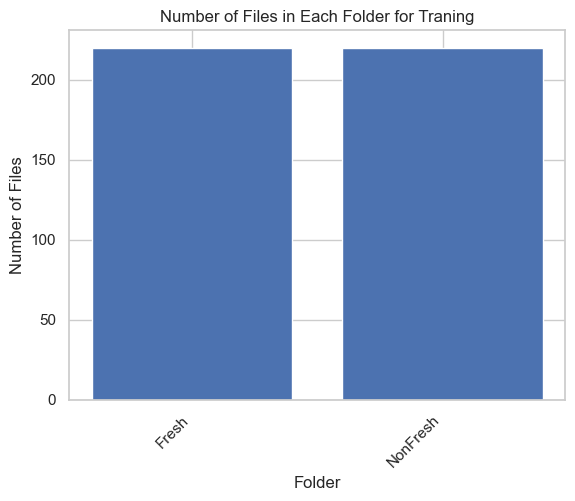

In [36]:
import os
import glob as gb
import matplotlib.pyplot as plt

trainpath = './Datasets/'

folder_counts = {}
for folder in os.listdir(trainpath):
    files = gb.glob(pathname=str(trainpath + folder + '/*.jpg'))
    folder_counts[folder] = len(files)

plt.bar(folder_counts.keys(), folder_counts.values())
plt.xlabel('Folder')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Folder for Traning')
plt.xticks(rotation=45, ha='right')
plt.show()


In [5]:

code = {'Fresh':0 ,'NonFresh':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [38]:
size = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(4000, 3000, 3)    400
(500, 500, 3)       40
Name: count, dtype: int64

In [7]:
s = 100


In [8]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 42) 

In [10]:
print(f'we have {len(X_train)} items in X_train')


we have 352 items in X_train


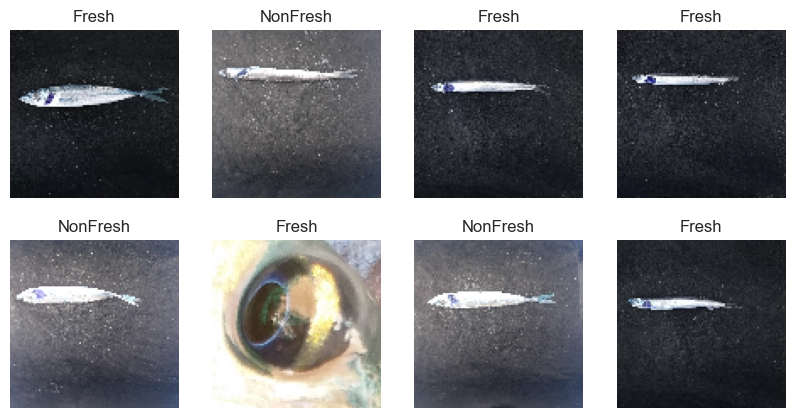

In [11]:

plt.figure(figsize=(10,5))
for n , i in enumerate(list(np.random.randint(0,len(X_train),8))) : 
    plt.subplot(2,4,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [12]:

print(f'we have {len(X_test)} items in X_test')


we have 88 items in X_test


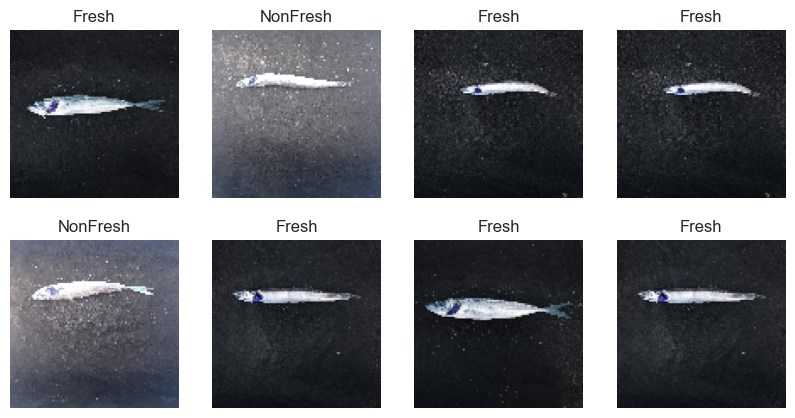

In [13]:


plt.figure(figsize=(10,5))
for n , i in enumerate(list(np.random.randint(0,len(X_test),8))) : 
    plt.subplot(2,4,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [14]:

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')

print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')


X_train shape  is (352, 100, 100, 3)
X_test shape  is (88, 100, 100, 3)
y_train shape  is (352,)
y_test shape  is (88,)


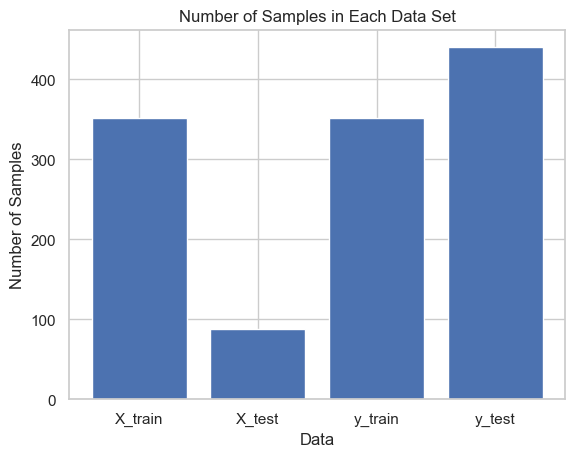

In [35]:
import matplotlib.pyplot as plt

data = [X_train, X_test, y_train, y_test]
labels = ['X_train', 'X_test', 'y_train', 'y_test']
sizes = [len(d) for d in data]

plt.bar(labels, sizes)
plt.xlabel('Data')
plt.ylabel('Number of Samples')
plt.title('Number of Samples in Each Data Set')
plt.show()

In [15]:
input_tensor = Input(shape=(100,100, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False



In [16]:


datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  


datagen.fit(X_train)



In [17]:

print('Model Details are : ')
print(model.summary())

Model Details are : 
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 49, 49, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 49, 49, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 49, 49, 32)           0         ['bat

 conv2d_11 (Conv2D)          (None, 10, 10, 32)           6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, 10, 10, 64)           192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, 10, 10, 64)           192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, 10, 10, 96)           288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, 10, 10, 96)           0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, 10, 10, 64)           0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, 10, 10, 288)          0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, 10, 10, 96)           55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, 10, 10, 96)           288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, 10, 10, 96)           0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, 4, 4, 384)            995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, 4, 4, 192)            147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, 4, 4, 192)            172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, 4, 4, 192)            172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, 4, 4, 192)            147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, 4, 4, 192)            576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, 4, 4, 768)            0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, 4, 4, 192)            147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, 4, 4, 192)            215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, 4, 4, 192)            215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, 4, 4, 160)            0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, 4, 4, 160)            0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, 4, 4, 768)            0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, 4, 4, 192)            576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, 4, 4, 192)            576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, 4, 4, 192)            0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, 4, 4, 192)            0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, 1, 1, 320)            552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, 1, 1, 192)            331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, 1, 1, 320)            960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, 1, 1, 192)            576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, 1, 1, 384)            0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, 1, 1, 384)            0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, 1, 1, 192)            576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, 1, 1, 384)            0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, 1, 1, 384)            0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, 1, 1, 384)            0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [18]:
model.compile(optimizer = Adam(learning_rate=1e-9), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [19]:
epochs = 10
mout = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=epochs,batch_size=32,verbose=1)


Epoch 1/10
11/11 [==============================] - 24s 1s/step - loss: 8.4523 - accuracy: 0.6222 - val_loss: 2.6011 - val_accuracy: 0.7386
Epoch 2/10
11/11 [==============================] - 8s 752ms/step - loss: 9.1672 - accuracy: 0.6136 - val_loss: 2.6007 - val_accuracy: 0.7386
Epoch 3/10
11/11 [==============================] - 8s 701ms/step - loss: 8.8268 - accuracy: 0.6506 - val_loss: 2.6004 - val_accuracy: 0.7386
Epoch 4/10
11/11 [==============================] - 7s 651ms/step - loss: 8.8578 - accuracy: 0.6080 - val_loss: 2.5998 - val_accuracy: 0.7386
Epoch 5/10
11/11 [==============================] - 8s 742ms/step - loss: 9.0631 - accuracy: 0.6108 - val_loss: 2.5992 - val_accuracy: 0.7386
Epoch 6/10
11/11 [==============================] - 8s 744ms/step - loss: 8.0497 - accuracy: 0.6307 - val_loss: 2.5989 - val_accuracy: 0.7386
Epoch 7/10
11/11 [==============================] - 7s 678ms/step - loss: 9.1003 - accuracy: 0.6080 - val_loss: 2.5983 - val_accuracy: 0.7386
Epoch 8/

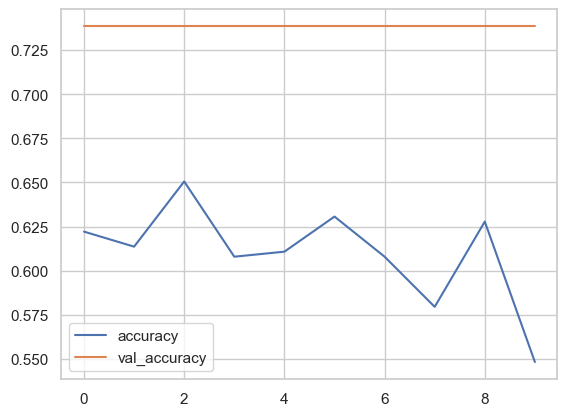

In [20]:
plt.plot(mout.history['accuracy'], label='accuracy')
plt.plot(mout.history['val_accuracy'], label='val_accuracy')
plt.legend()

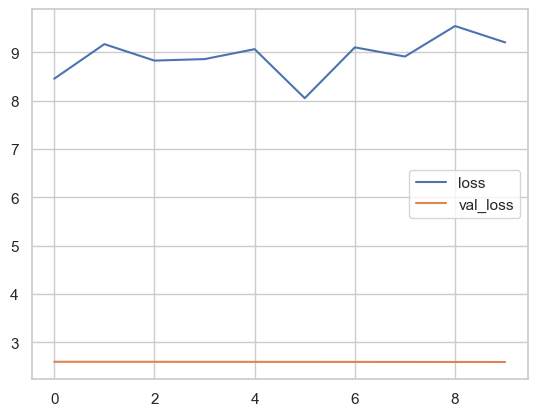

In [21]:
plt.plot(mout.history['loss'], label='loss')
plt.plot(mout.history['val_loss'], label='val_loss')
plt.legend()

In [22]:
y_actual=[]
y_test=[]
pthh=trainpath+"Fresh"
for i in os.listdir(pthh):
    img=cv2.imread(pthh+"/"+i)
    img=cv2.resize(img, (100,100), interpolation=cv2.INTER_CUBIC)
    img=np.array(img)
    #img=img/255
    img=np.expand_dims(img,axis=0)
    p=model.predict(img,verbose=0)

    y_test.append(round(p[0][0]))
    y_actual.append(0)
    
pthh=trainpath+"NonFresh"
for i in os.listdir(pthh):
    img=cv2.imread(pthh+"/"+i)
    img=cv2.resize(img, (100,100), interpolation=cv2.INTER_CUBIC)
    img=np.array(img)
    #img=img/255
    img=np.expand_dims(img,axis=0)
    p=model.predict(img,verbose=0)

    y_test.append(round(p[0][0]))
    y_actual.append(1)

Accuracy: 75.227 %
Precision: 0.80732
Recall: 0.75227
F1 Score: 0.75928


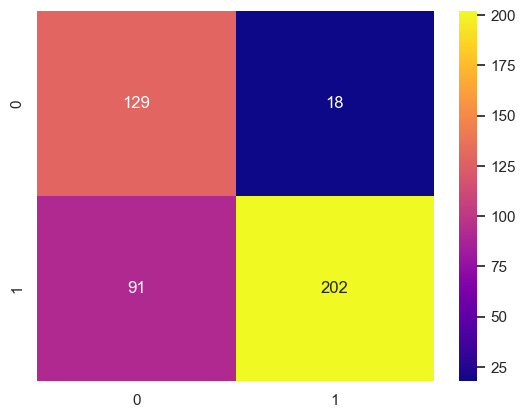

In [23]:

cm=metrics.confusion_matrix(y_test, y_actual)
sns.heatmap(cm,cmap="plasma",fmt="d",annot=True)
print('Accuracy:', np.round(metrics.accuracy_score(y_test,y_actual, ),5)*100,"%")
print('Precision:', np.round(metrics.precision_score(y_test,y_actual, average='weighted'),5))
print('Recall:', np.round(metrics.recall_score(y_test,y_actual, average='weighted'),5))
print('F1 Score:', np.round(metrics.f1_score(y_test,y_actual, average='weighted'),5))

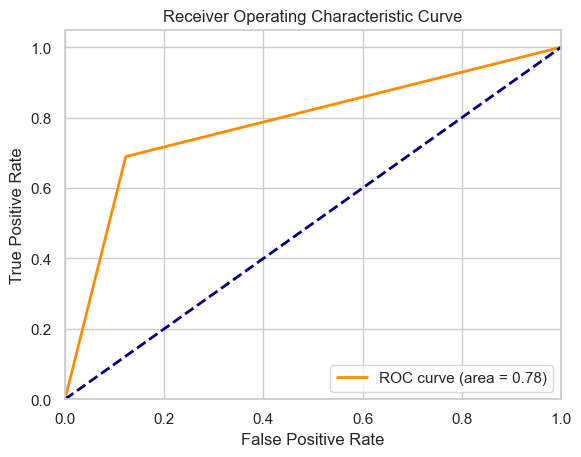

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_actual)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()


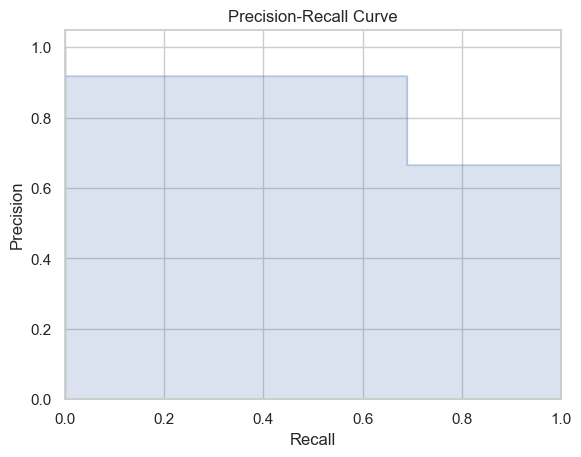

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_actual)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()


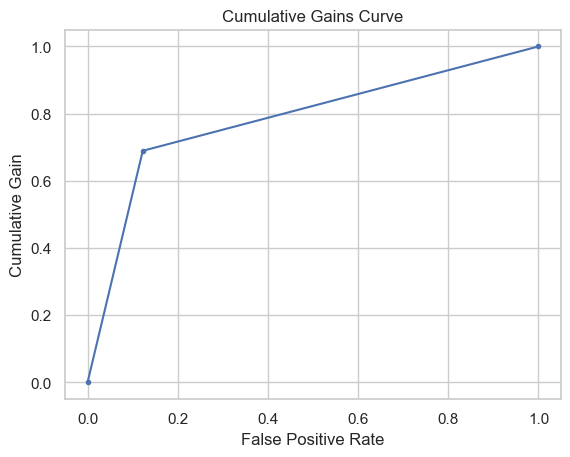

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test,y_actual)
cumulative_gain = tpr

plt.plot(fpr, cumulative_gain, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('Cumulative Gain')
plt.title('Cumulative Gains Curve')
plt.show()



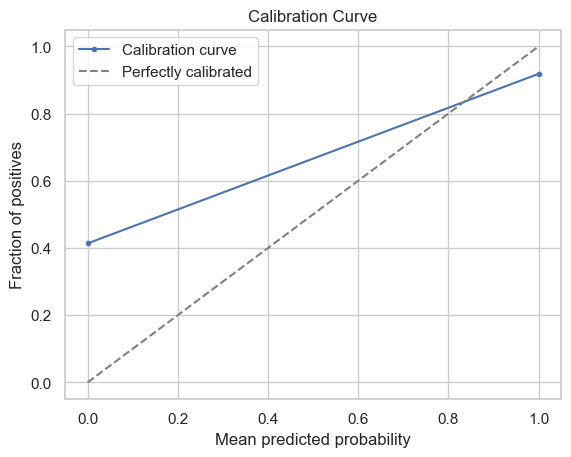

In [33]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test,y_actual, n_bins=10)
plt.plot(prob_pred, prob_true, marker='.', label='Calibration curve')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration Curve')
plt.legend(loc='upper left')
plt.show()
